# Importing Libraries and Dataset

In [1]:
#Importing libraries
import streamlit as st
import pandas as pd 
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from streamlit_keplergl import keplergl_static 
from keplergl import KeplerGl
from datetime import datetime as dt 

In [2]:
#Loading the data
df = pd.read_csv("Data/Processed/citibike_2022_with_weather.csv")
df.head()

/var/folders/wf/s0crnzgd66b7pdj9_7_b6mpw0000gn/T/ipykernel_23281/4192526146.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/Processed/citibike_2022_with_weather.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,3A2034DA67C8874B,electric_bike,2022-09-14 20:37:39.155,2022-09-14 21:05:39.760,N 12 St & Bedford Ave,5450.04,Albany St & Greenwich St,5145.02,40.720796,-73.954882,40.709267,-74.013247,casual,2022-09-14,22.9,both
1,F1C63DACDCC1C33D,electric_bike,2022-09-17 19:21:39.407,2022-09-17 20:08:32.670,Union Ave & Jackson St,5300.06,Metropolitan Ave & Meeker Ave,5300.05,40.716075,-73.952029,40.714133,-73.952344,casual,2022-09-17,20.8,both
2,94372C52777F4AC1,electric_bike,2022-09-17 16:49:21.830,2022-09-17 17:01:51.537,S 4 St & Wythe Ave,5204.05,St Marks Pl & 1 Ave,5626.13,40.712874,-73.965935,40.727791,-73.985649,casual,2022-09-17,20.8,both
3,44818FEC94B62B66,electric_bike,2022-09-08 12:27:40.019,2022-09-08 12:47:15.649,Amsterdam Ave & W 73 St,7260.09,Washington St & Gansevoort St,6039.06,40.779668,-73.980930,40.739323,-74.008119,casual,2022-09-08,21.8,both
4,F8A63709F214EBAA,classic_bike,2022-09-16 19:00:19.266,2022-09-16 19:07:28.905,University Pl & E 14 St,5905.14,Washington St & Gansevoort St,6039.06,40.734814,-73.992085,40.739323,-74.008119,member,2022-09-16,19.6,both


In [17]:
#Converting date to datetime 
df["date"] = pd.to_datetime(df["date"])

In [3]:
#Creating a 30% random sample
df_sample = df.sample(frac=0.3, random_state=42).copy()
df_sample.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
15115901,F66F3FD176B86390,electric_bike,2022-08-03 09:32:03.967,2022-08-03 10:32:12.464,Delancey St & Eldridge St,5414.07,NaN,NaN,40.719440,-73.991804,40.670000,-73.990000,casual,2022-08-03,27.6,both
753105,9FA92A23DAA636C4,electric_bike,2022-09-16 08:02:48.369,2022-09-16 08:06:25.251,1 Ave & E 78 St,7020.09,E 88 St & 1 Ave,7235.13,40.771404,-73.953517,40.778301,-73.948813,member,2022-09-16,19.6,both
23821092,021C712DBEF40F84,classic_bike,2022-10-12 17:31:51.550,2022-10-12 17:46:15.185,St James Pl & Oliver St,5238.05,E 1 St & Bowery,5636.13,40.713079,-73.998512,40.724861,-73.992131,casual,2022-10-12,17.9,both
17525642,B23EC0300455C2AD,electric_bike,2022-08-14 15:53:17.790,2022-08-14 16:16:22.126,E 4 St & 2 Ave,5593.04,Columbia Heights & Cranberry St,4829.01,40.726239,-73.989637,40.700379,-73.995481,casual,2022-08-14,24.0,both
6397983,7E2CB79CE92BDB24,classic_bike,2022-05-10 21:09:56.750,2022-05-10 21:17:36.103,E 25 St & 2 Ave,6046.02,E 16 St & 5 Ave,6022.04,40.739126,-73.979738,40.737262,-73.992390,member,2022-05-10,15.4,both


In [7]:
#Confirming size
len(df_sample) / len(df)

0.30000000670268107

In [17]:
#Renaming columns
df_sample.rename(columns={
    'start_station_name': 'start_station',
    'end_station_name': 'end_station',
    'value': 'trips'
}, inplace=True)

In [19]:
#Saving the sample dataset
df_sample.to_csv("Data/Processed/citibike_2022_sample_30%.csv", index=False)

In [20]:
#Counting trips per start station
top_stations = (
    df.groupby("start_station")
      .size()
      .reset_index(name="trips")         
      .sort_values("trips", ascending=False))

In [25]:
#Preview
top300 = top_stations.head(300).copy()
top300.head()

,start_station,trips
1587,W 21 St & 6 Ave,129018
1718,West St & Chambers St,123291
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106445
8,1 Ave & E 68 St,104856


In [24]:
#Top 20
top20 = top_stations.head(20).copy()
top20.head()

,start_station,trips
1587,W 21 St & 6 Ave,129018
1718,West St & Chambers St,123291
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106445
8,1 Ave & E 68 St,104856


In [26]:
#Saving
top20.to_csv("top20.csv", index=False)
top300.to_csv("top300.csv", index=False)

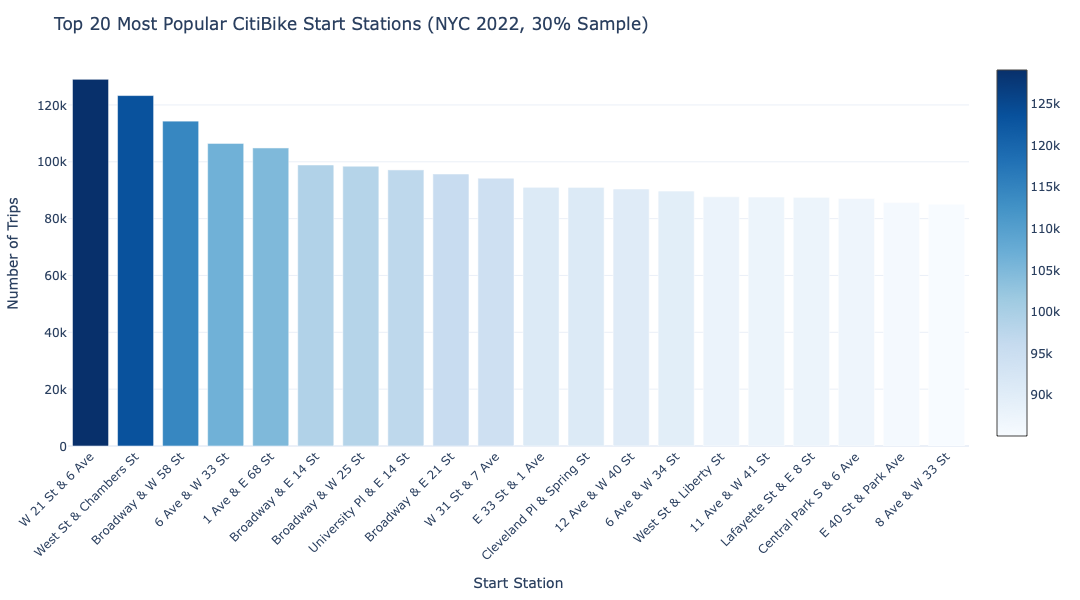

In [33]:
#plotting
fig_bar = go.Figure(
    go.Bar(
        x=top20["start_station"],
        y=top20["trips"],
        marker=dict(
            color=top20["trips"],         
            colorscale="Blues",            
            showscale=True )))

fig_bar.update_layout(
    title="Top 20 Most Popular CitiBike Start Stations (NYC 2022, 30% Sample)",
    xaxis_title="Start Station",
    yaxis_title="Number of Trips",
    template="plotly_white",
    height=600,
    margin=dict(l=40, r=40, t=60, b=140))

fig_bar.update_xaxes(tickangle=-45)
fig_bar

In [41]:
#Filtering to only include 2022
daily = daily[daily["date"].dt.year == 2022]

In [40]:
#daily aggregated df
daily = (
    df_sample.groupby("date")
    .agg(
        bike_rides_daily=("start_station", "count"),
        avgTemp=("avgTemp", "mean")  )
    .reset_index())

daily["date"] = pd.to_datetime(daily["date"], errors="coerce")
daily.to_csv("daily_rides_weather_sample_30pct.csv", index=False)

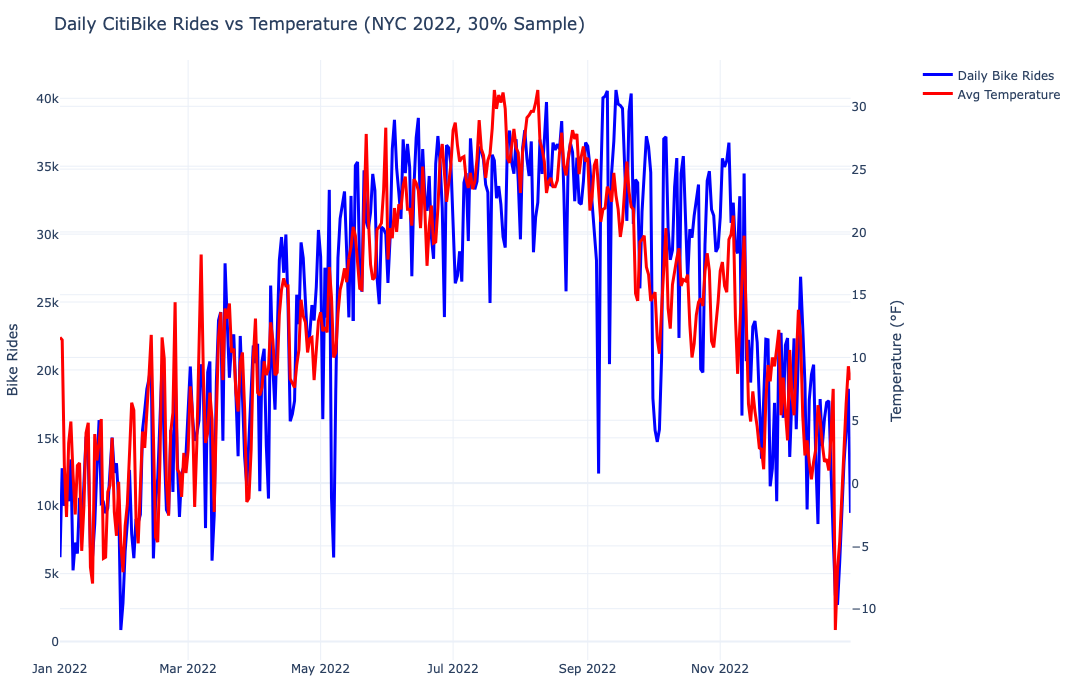

In [44]:
#Plotting dual axis line chart for Rides Vs. Temp

fig_line = make_subplots(specs=[[{"secondary_y": True}]])

fig_line.add_trace(
    go.Scatter(
        x=daily["date"],
        y=daily["bike_rides_daily"],
        name="Daily Bike Rides",
        mode="lines",
        line=dict(width=3, color="blue") ),
    secondary_y=False)

fig_line.add_trace(
    go.Scatter(
        x=daily["date"],
        y=daily["avgTemp"],
        name="Avg Temperature",
        mode="lines",
        line=dict(width=3, color="red") ),
    secondary_y=True)

fig_line.update_layout(
    title="Daily CitiBike Rides vs Temperature (NYC 2022, 30% Sample)",
    template="plotly_white",
    height=700,
    margin=dict(l=40, r=40, t=60, b=40))

fig_line.update_yaxes(title_text="Bike Rides", secondary_y=False)
fig_line.update_yaxes(title_text="Temperature (°F)", secondary_y=True)

fig_line